In [22]:
%matplotlib inline
from pyuvdata import UVData
import hera_pspec as hp
import numpy as np
import matplotlib.pyplot as plt
import copy, os, itertools, inspect
from hera_pspec.data import DATA_PATH
import scipy
import matplotlib.gridspec as gspec
from scipy.optimize import curve_fit
import math
from matplotlib.ticker import MaxNLocator

In [23]:
# select the data file to load
dfile = os.path.join(DATA_PATH, 'zen.2458116.38650.xx.HH.uvOCRS')
# Load into UVData objects
uvd = UVData()
uvd.read(dfile)

In [24]:
def Simulated_Gaussian_Noise(sigma,mu):
    
    for time in range(0,60):
        if time == 0:
            visibility_data = np.random.normal(mu,sigma,1024)
        else:
            noise = np.random.normal(mu,sigma,1024)
        if time != 0:
            visibility_data = np.vstack((visibility_data,noise))
    
    return visibility_data

(60, 1024) (60, 1024)


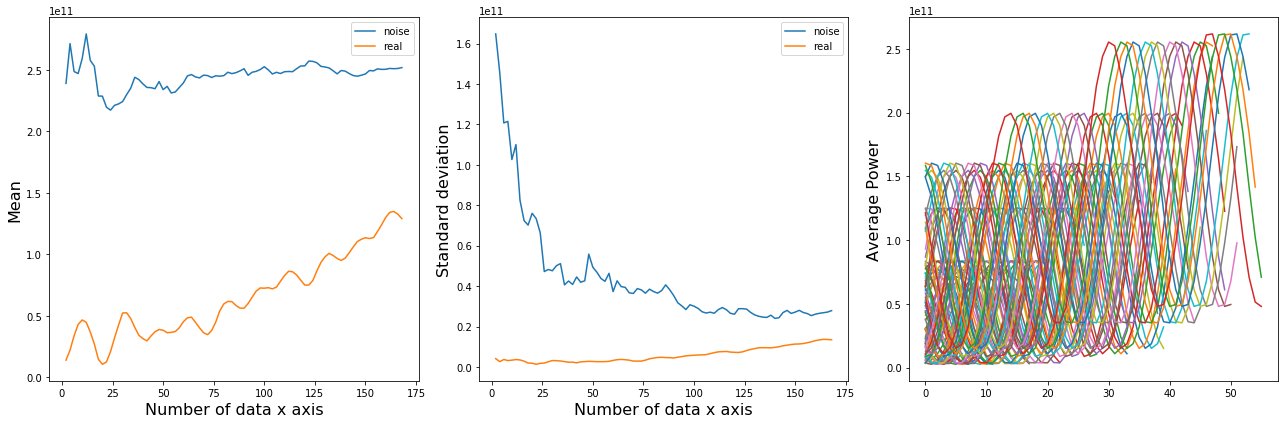

In [21]:
fmin=520
fmax=690
spw_jumps = 2
plt.figure(figsize=(18,6))
gs = gspec.GridSpec(1, 3)
plt.subplot(gs[0, 2])
real_data = uvd.get_data((67,70,'xx'))
vis_noise = Simulated_Gaussian_Noise(np.std(np.mean(np.abs(real_data),axis=0)),np.mean(np.mean(np.abs(real_data),axis=0)))
#vis_noise = Simulated_Gaussian_Noise(10,2)
std_real = []
mean_real = []
std_noise = []
mean_noise = []

data_quantity = np.arange(spw_jumps,fmax-fmin,spw_jumps)
delay_real = np.fft.fftshift(np.fft.fft(np.fft.fftshift(real_data[:,:],axes=1),axis=1),axes=1)
delay_noise = np.fft.fftshift(np.fft.fft(np.fft.fftshift(vis_noise[:,:],axes=1),axis=1),axes=1)
print(delay_noise.shape,delay_real.shape)
for num in data_quantity:
    #delay_real = np.fft.fftshift(np.fft.fft(np.fft.fftshift(real_data[:,fmin:fmin+num],axes=1),axis=1),axes=1)
    odd_real_v = delay_real[::2,:]
    even_real_v = delay_real[1::2,:]
    
    if odd_real_v.shape[0] != even_real_v.shape[0]:
        print(odd_real_v.shape[0],even_real_v.shape[0])
        if odd_real_v.shape[0] > even_real_v.shape[0]:
            odd_real_v = odd_real_v[0:-1,:]
        else:
            even_real_v = even_real_v[0:-1,:]
    power_real = np.abs(even_real_v[:,int(2*num/3):num])*np.abs(odd_real_v[:,int(2*num/3):num])
    
    std_real.append(np.std(np.mean(power_real,axis=1)))
    mean_real.append(np.mean(np.mean(power_real,axis=1)))
    
    
    
    odd_noise_v = delay_noise[::2,:]
    even_noise_v = delay_noise[1::2,:]
    
    if odd_noise_v.shape[0] != even_noise_v.shape[0]:
        print(odd_noise_v.shape[0],even_noise_v.shape[0])
        if odd_noise_v.shape[0] > even_noise_v.shape[0]:
            odd_noise_v = odd_noise_v[0:-1,:]
        else:
            even_noise_v = even_noise_v[0:-1,:]
    power_noise = np.abs(even_noise_v[:,int(2*num/3):num])*np.abs(odd_noise_v[:,int(2*num/3):num])
    
    plt.plot(np.mean(power_real,axis=0))
    
    std_noise.append(np.std(np.mean(power_noise,axis=1)))
    mean_noise.append(np.mean(np.mean(power_noise,axis=1)))

plt.ylabel("Average Power",fontsize=16)
#plt.xlabel("Number data x axis",fontsize=16)
#plt.legend(data_quantity,ncol=2)

#plt.yscale('log')
plt.subplot(gs[0, 1])
plt.plot(data_quantity,std_noise,label="noise")
plt.plot(data_quantity,std_real,label="real")
plt.legend()
plt.ylabel("Standard deviation",fontsize=16)
plt.xlabel("Number of data x axis",fontsize=16)
plt.subplot(gs[0, 0])
plt.plot(data_quantity,mean_noise,label="noise")
plt.plot(data_quantity,mean_real,label="real")
plt.legend()
plt.ylabel("Mean",fontsize=16)
plt.xlabel("Number of data x axis",fontsize=16)

plt.tight_layout()
plt.show()

In [5]:

vis_data = Simulated_Gaussian_Noise(100,0)
print(vis.shape)
plt.plot(vis_data)
plt.show()

NameError: name 'vis' is not defined

In [13]:

delay_vis = np.fft.fftshift(np.fft.fft(np.fft.fftshift(vis_data[:,520:690],axes=1),axis=1),axes=1)

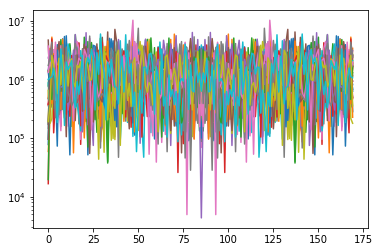

In [14]:
#odd_time_V = data_fft[::2,int(2*(spw_size)/3):int(spw_size)]
#even_time_V = data_fft[1::2,int(2*(spw_size)/3):int(spw_size)]
odd_time_V = delay_vis[::2,:]
even_time_V = delay_vis[1::2,:]

power = np.abs(even_time_V)*np.abs(odd_time_V)
plt.yscale('log')

plt.plot(power.T[:,:])
plt.show()

(array([42., 45., 32., 15., 20.,  4.,  4.,  2.,  4.,  2.]),
 array([  37461.4092696 ,  604592.7457031 , 1171724.08213659,
        1738855.41857009, 2305986.75500359, 2873118.09143709,
        3440249.42787058, 4007380.76430408, 4574512.10073758,
        5141643.43717107, 5708774.77360457]),
 <a list of 10 Patch objects>)

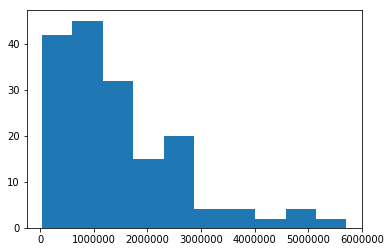

In [15]:
plt.hist(power.T[:,2])

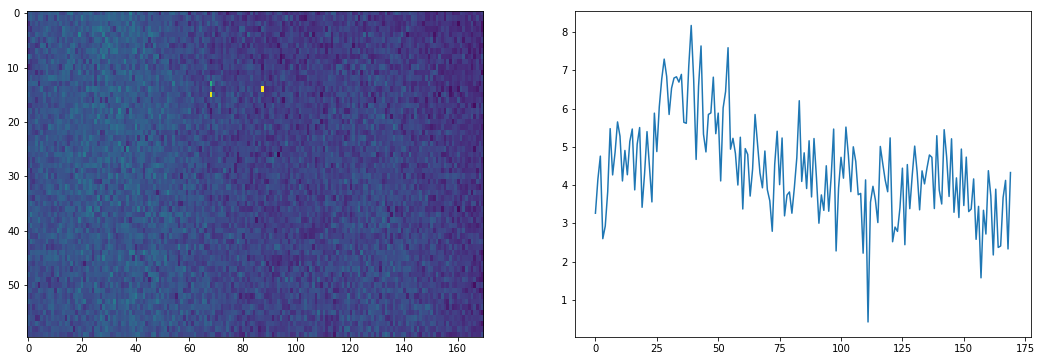

In [27]:

key=(66,70,'xx')
ind1,ind2,indp = uvd._key2inds(key)
real_data =uvd.data_array[ind1,0,:,0]
#real_data = uvd.get_data((122,142,'xx'))
plt.figure(figsize=(18,6))
gs = gspec.GridSpec(1, 2)
plt.subplot(gs[0, 0])
plt.imshow(np.abs(real_data[:,520:690]), aspect='auto')
plt.subplot(gs[0, 1])

plt.plot(np.mean(real_data[:,520:690],axis=0))

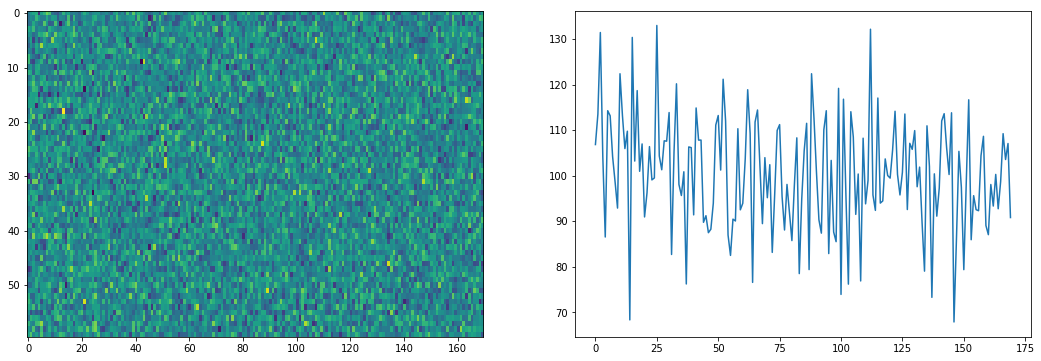

In [17]:
vis = Simulated_Gaussian_Noise(100,100)
plt.figure(figsize=(18,6))
gs = gspec.GridSpec(1, 2)
plt.subplot(gs[0, 0])
plt.imshow(vis[:,520:690], aspect='auto')
plt.subplot(gs[0, 1])

plt.plot(np.mean(vis[:,520:690],axis=0))